In [1]:
import pickle as pkl
import numpy as np
import matplotlib
#matplotlib.rcParams.update({'font.size': 40})
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
import pandas as pd
import os
import time
from collections import OrderedDict
from summary_utils import read_mols_baseline, read_mols_neuralnet
%matplotlib inline

In [2]:
dataset = 'QM9'
num_conformers = [1, 5, 10, 25, 50, 100]
nn_hyperparams = ["prior_T=0.5", "prior_T=1", "prior_T=2", "prior_T=4"]
#nn_hyperparams = ["prior_T=1"]

In [3]:
ff_mols = read_mols_baseline('/home/mansimov/projects/dl4chem-geometry/results/ff/{}/_test_/rep_100_iter_200/mols'.format(dataset), num_conformers)

done 0 out of 5000
done 500 out of 5000
done 1000 out of 5000
done 1500 out of 5000
done 2000 out of 5000
done 2500 out of 5000
done 3000 out of 5000
done 3500 out of 5000
done 4000 out of 5000
done 4500 out of 5000
time took 19.603898286819458


In [4]:
nn_mols = OrderedDict()
for nn_i in nn_hyperparams:
    nn_mols[nn_i] = read_mols_neuralnet('/home/mansimov/projects/dl4chem-geometry/results/nn/{}/{}/_test_'.format(nn_i, dataset), num_conformers)

done 0 out of 5000
done 500 out of 5000
done 1000 out of 5000
done 1500 out of 5000
done 2000 out of 5000
done 2500 out of 5000
done 3000 out of 5000
done 3500 out of 5000
done 4000 out of 5000
done 4500 out of 5000
time took 2.878918170928955
done 0 out of 5000
done 500 out of 5000
done 1000 out of 5000
done 1500 out of 5000
done 2000 out of 5000
done 2500 out of 5000
done 3000 out of 5000
done 3500 out of 5000
done 4000 out of 5000
done 4500 out of 5000
time took 2.4745380878448486
done 0 out of 5000
done 500 out of 5000
done 1000 out of 5000
done 1500 out of 5000
done 2000 out of 5000
done 2500 out of 5000
done 3000 out of 5000
done 3500 out of 5000
done 4000 out of 5000
done 4500 out of 5000
time took 2.7118561267852783
done 0 out of 5000
done 500 out of 5000
done 1000 out of 5000
done 1500 out of 5000
done 2000 out of 5000
done 2500 out of 5000
done 3000 out of 5000
done 3500 out of 5000
done 4000 out of 5000
done 4500 out of 5000
time took 2.1066696643829346


In [5]:
mols_summary = {}
mols_summary["method"] = []
mols_summary["results"] = []
mols_summary["num_conformers"] = []

for n_conf in num_conformers:
    min_mmff = [ff_mols[mol_num]['min_mmff'][n_conf] for mol_num in ff_mols.keys()]
    min_uff = [ff_mols[mol_num]['min_uff'][n_conf] for mol_num in ff_mols.keys()]
    #min_mmff = [ff_mols[mol_num]['median_mmff'][n_conf] for mol_num in ff_mols.keys()]
    #min_uff = [ff_mols[mol_num]['median_uff'][n_conf] for mol_num in ff_mols.keys()]

    mols_summary['method'] = mols_summary['method'] + ["MMFF"] * len(min_mmff) + ["UFF"] * len(min_uff)
    mols_summary['results'] = mols_summary['results'] + min_mmff + min_uff
    mols_summary['num_conformers'] = mols_summary['num_conformers'] + [n_conf] * len(min_uff + min_mmff)

    for nn_i in nn_hyperparams:
        nn_mol = nn_mols[nn_i]

        ### NOTE keep in mind that for neural net we only use molecule indicies for which MMFF and UFF baselines succeeded
        min_nn_rmsd = [nn_mol[mol_num]['min_rmsd'][n_conf] for mol_num in ff_mols.keys()]
        #min_nn_rmsd = [nn_mol[mol_num]['median_rmsd'][n_conf] for mol_num in ff_mols.keys()]

        mols_summary['method'] = mols_summary['method'] + ["Neural Net {}".format(nn_i)] * len(min_nn_rmsd)
        #mols_summary['method'] = mols_summary['method'] + ["Neural Net"] * len(min_nn_rmsd)
        mols_summary['results'] = mols_summary['results'] + min_nn_rmsd
        mols_summary['num_conformers'] = mols_summary['num_conformers'] + [n_conf] * len(min_nn_rmsd)

for k in mols_summary.keys():
    mols_summary[k] = np.array(mols_summary[k])

(173052,)
(173052,)
(173052,)


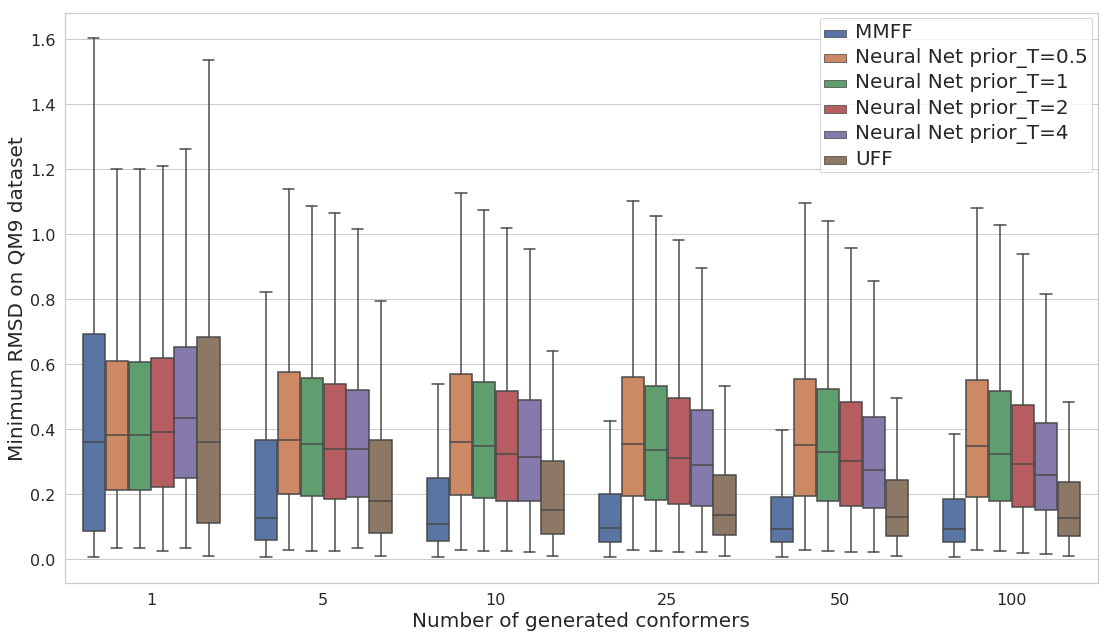

In [6]:
mols_summary["results"] = pd.Series(mols_summary["results"], dtype="float32")
mols_summary["method"] = pd.Series(mols_summary["method"], dtype="category")
mols_summary["num_conformers"] = pd.Series(mols_summary["num_conformers"], dtype="category")

print (mols_summary["results"].shape)
print (mols_summary["method"].shape)
print (mols_summary["num_conformers"].shape)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
#ax = sns.boxplot(x="method", y="results", hue="num_conformers", data=ff_mols_summary)
ax = sns.boxplot(x="num_conformers", y="results", hue="method", data=mols_summary, showfliers=False)
ax.set_xlabel('Number of generated conformers', fontsize=20)
ax.set_ylabel('Minimum RMSD on {} dataset'.format(dataset), fontsize=20)
#ax.set_ylabel('Median RMSD on {} dataset'.format(dataset), fontsize=20)
plt.legend(loc='upper right')
plt.setp(ax.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='20') # for legend title
ax.tick_params(labelsize=16)
